## Categorising countries

### Data Source

The data used in this task was orginally sourced from Help.NGO. This international non-governmental organisation specialises in emergency response, preparedness, and risk mitigation.  

### Dataset Attributes
- country: name of the country
- child_mort: death of children under 5 years of age per 1000 live births
- exports: exports of goods and services per capita. Given as a percentage of the GDP per capita
- health: total health spending per capita. Given as a percentage of GDP per capita
- imports: imports of goods and services per capita. Given as a percentage of the GDP per capita
- income: net income per person
- inflation: the measurement of the annual growth rate of the Total GDP
- life_expec: the average number of years a new born child would live if the current mortality patterns remain the same
- total_fer: the number of children that would be born to each woman if the current age-fertility rates remains the same
- gdpp: the GDP per capita. Calculated as the Total GDP divided by the total population.

## Objective  
To group countries using socio-economic and health factors to determine the development status of the country.

In [1]:
# Import libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Random state seed
rseed = 42

## Load and explore data

In [3]:
# Import the dataset
country_df = pd.read_csv('Country-data.csv')

In [4]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
# Check datatypes & counts
print(country_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB
None


In [6]:
# Get descriptive statistics
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
# Identify any missing data
country_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## Preprocessing and Feature Selection

In [8]:
# Drop any non-numeric features (columns)
country_df.drop("country", axis=1, inplace=True)

country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 11.9 KB


<Axes: >

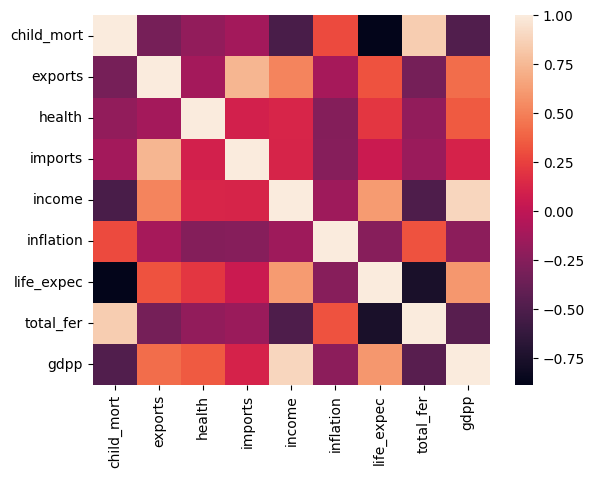

In [ ]:
# Create a correlation map of features to explore relationships between features

sns.heatmap(country_df.corr())

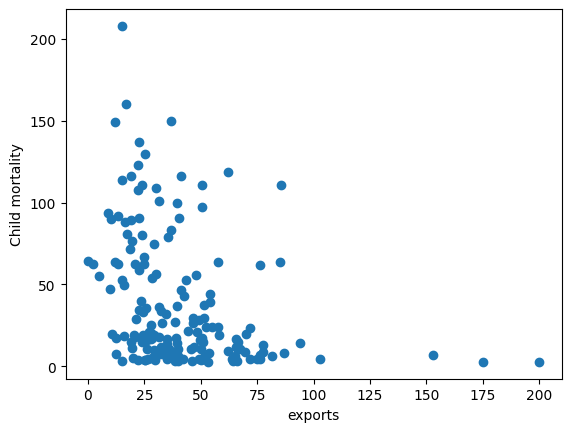

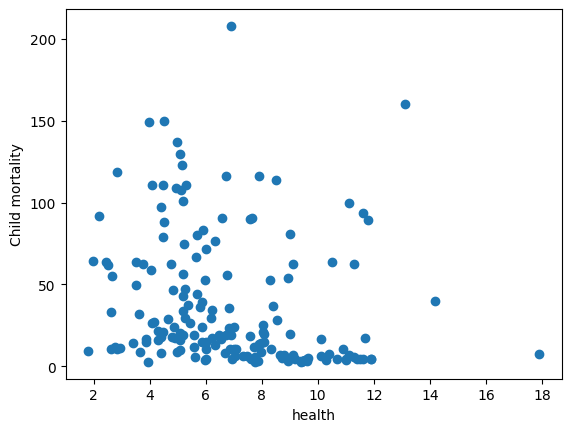

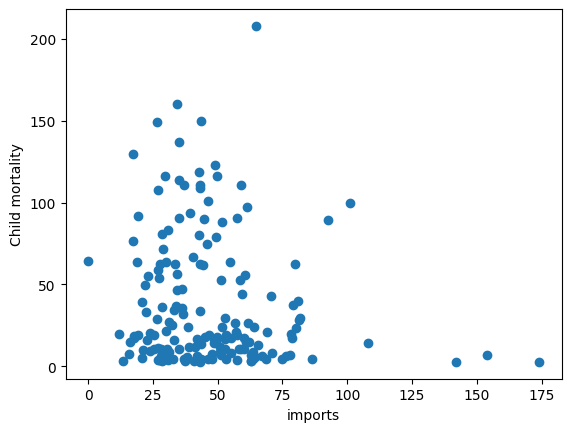

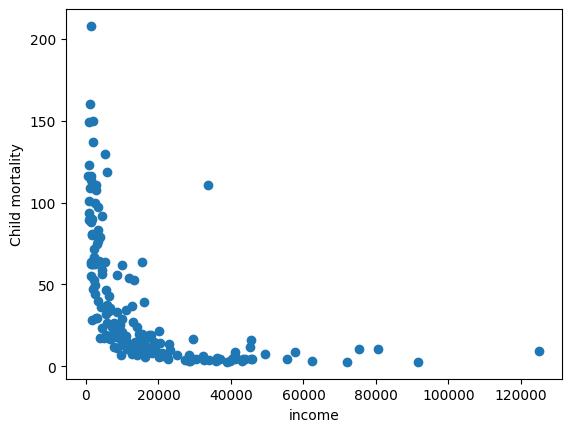

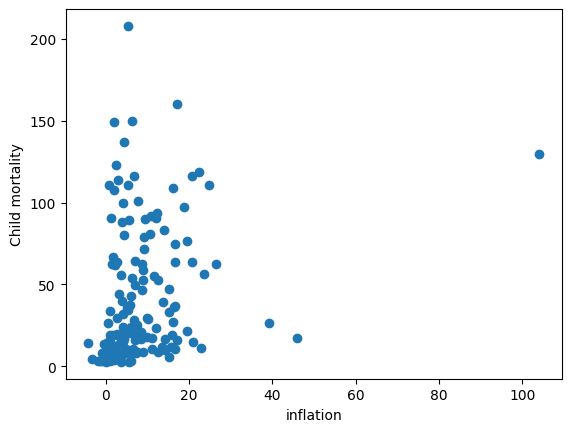

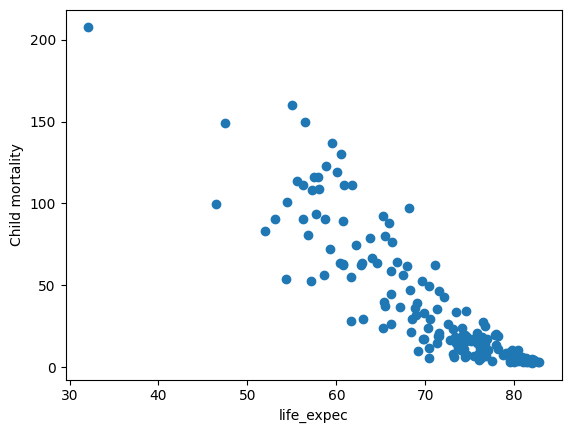

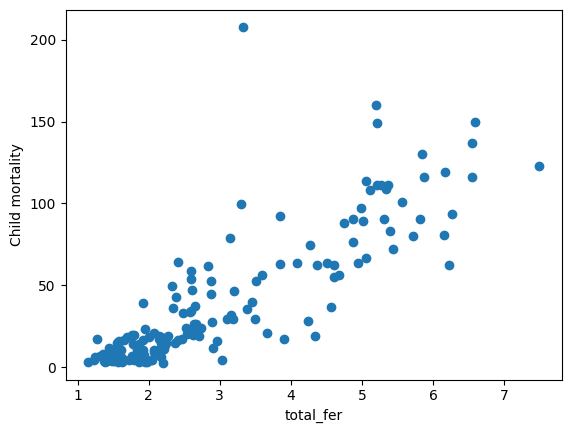

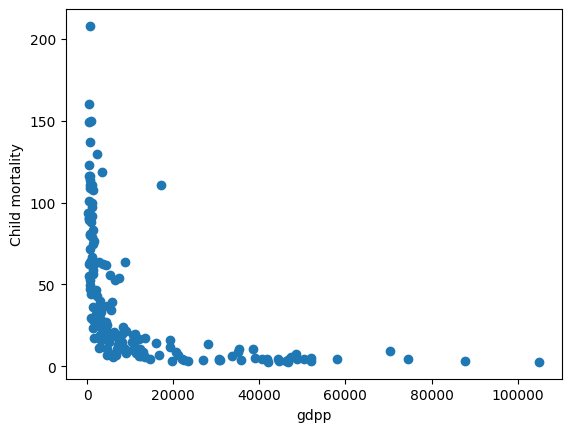

In [10]:
# Explore the continuous independent features against child_mort using scatter plots.
for f in country_df.columns[1:]:
  plt.scatter(country_df[f], country_df['child_mort'])
  plt.xlabel(f)
  plt.ylabel('Child mortality')
  plt.show()


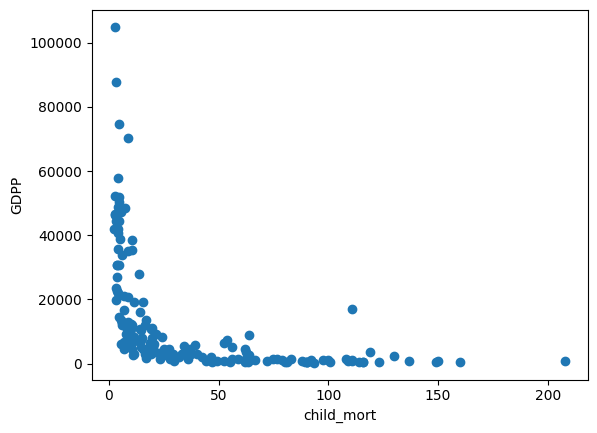

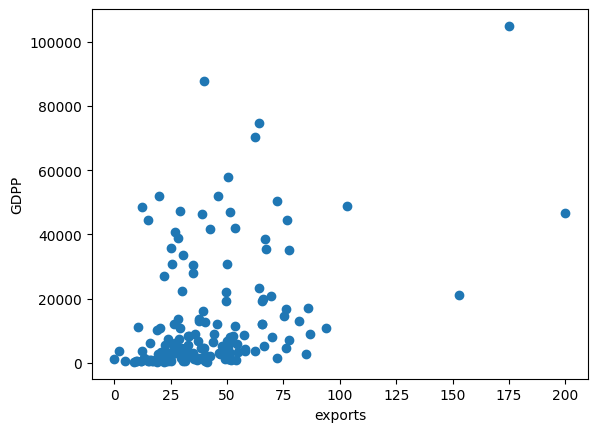

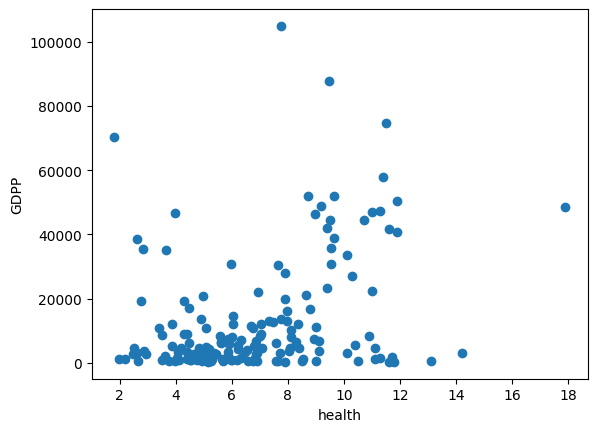

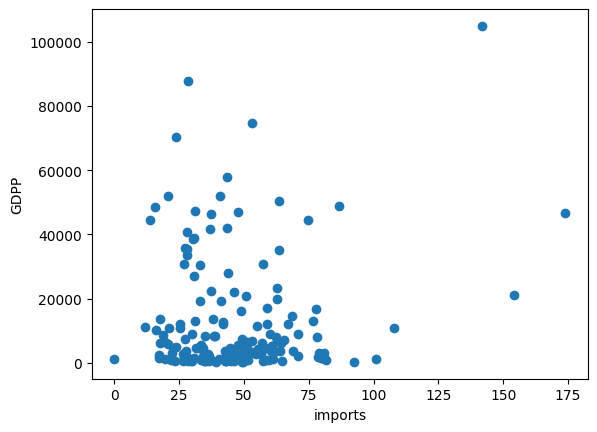

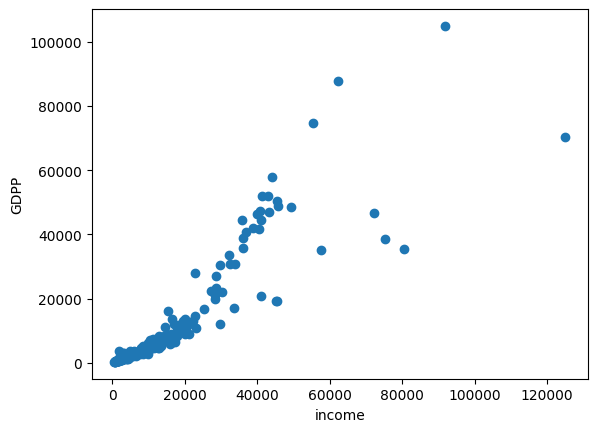

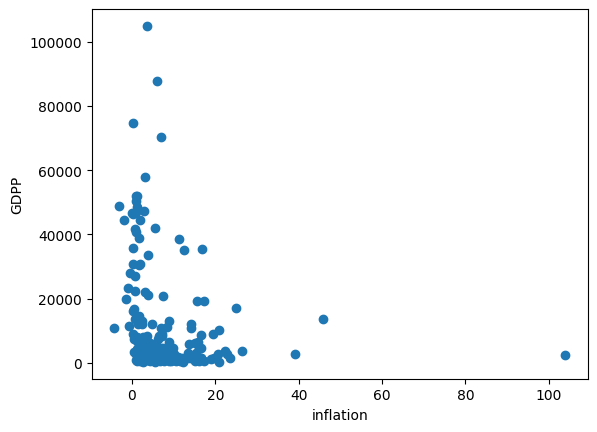

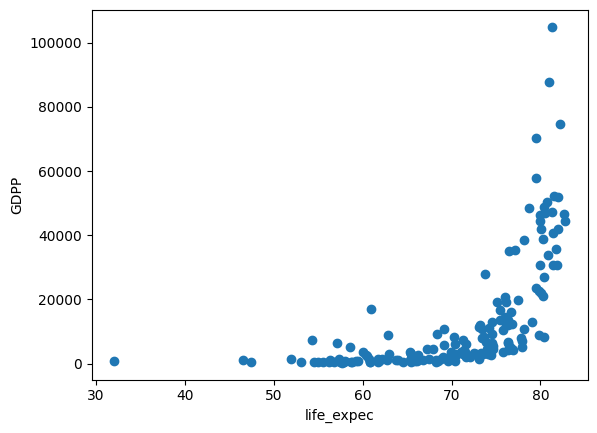

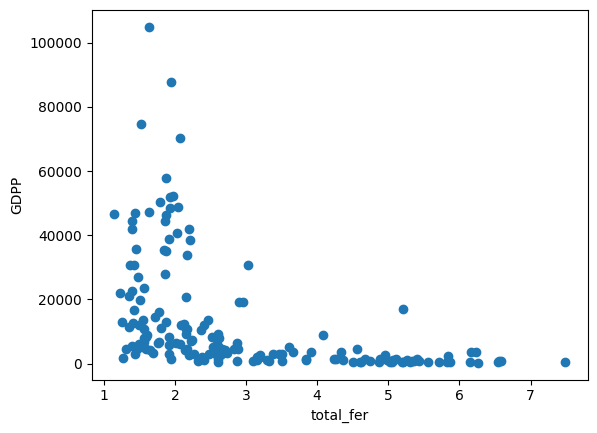

In [11]:
# Explore the continuous independent features against gdpp using scatter plots.
for f in country_df.columns[0:-1]:
  plt.scatter(country_df[f], country_df['gdpp'])
  plt.xlabel(f)
  plt.ylabel('GDPP')
  plt.show()

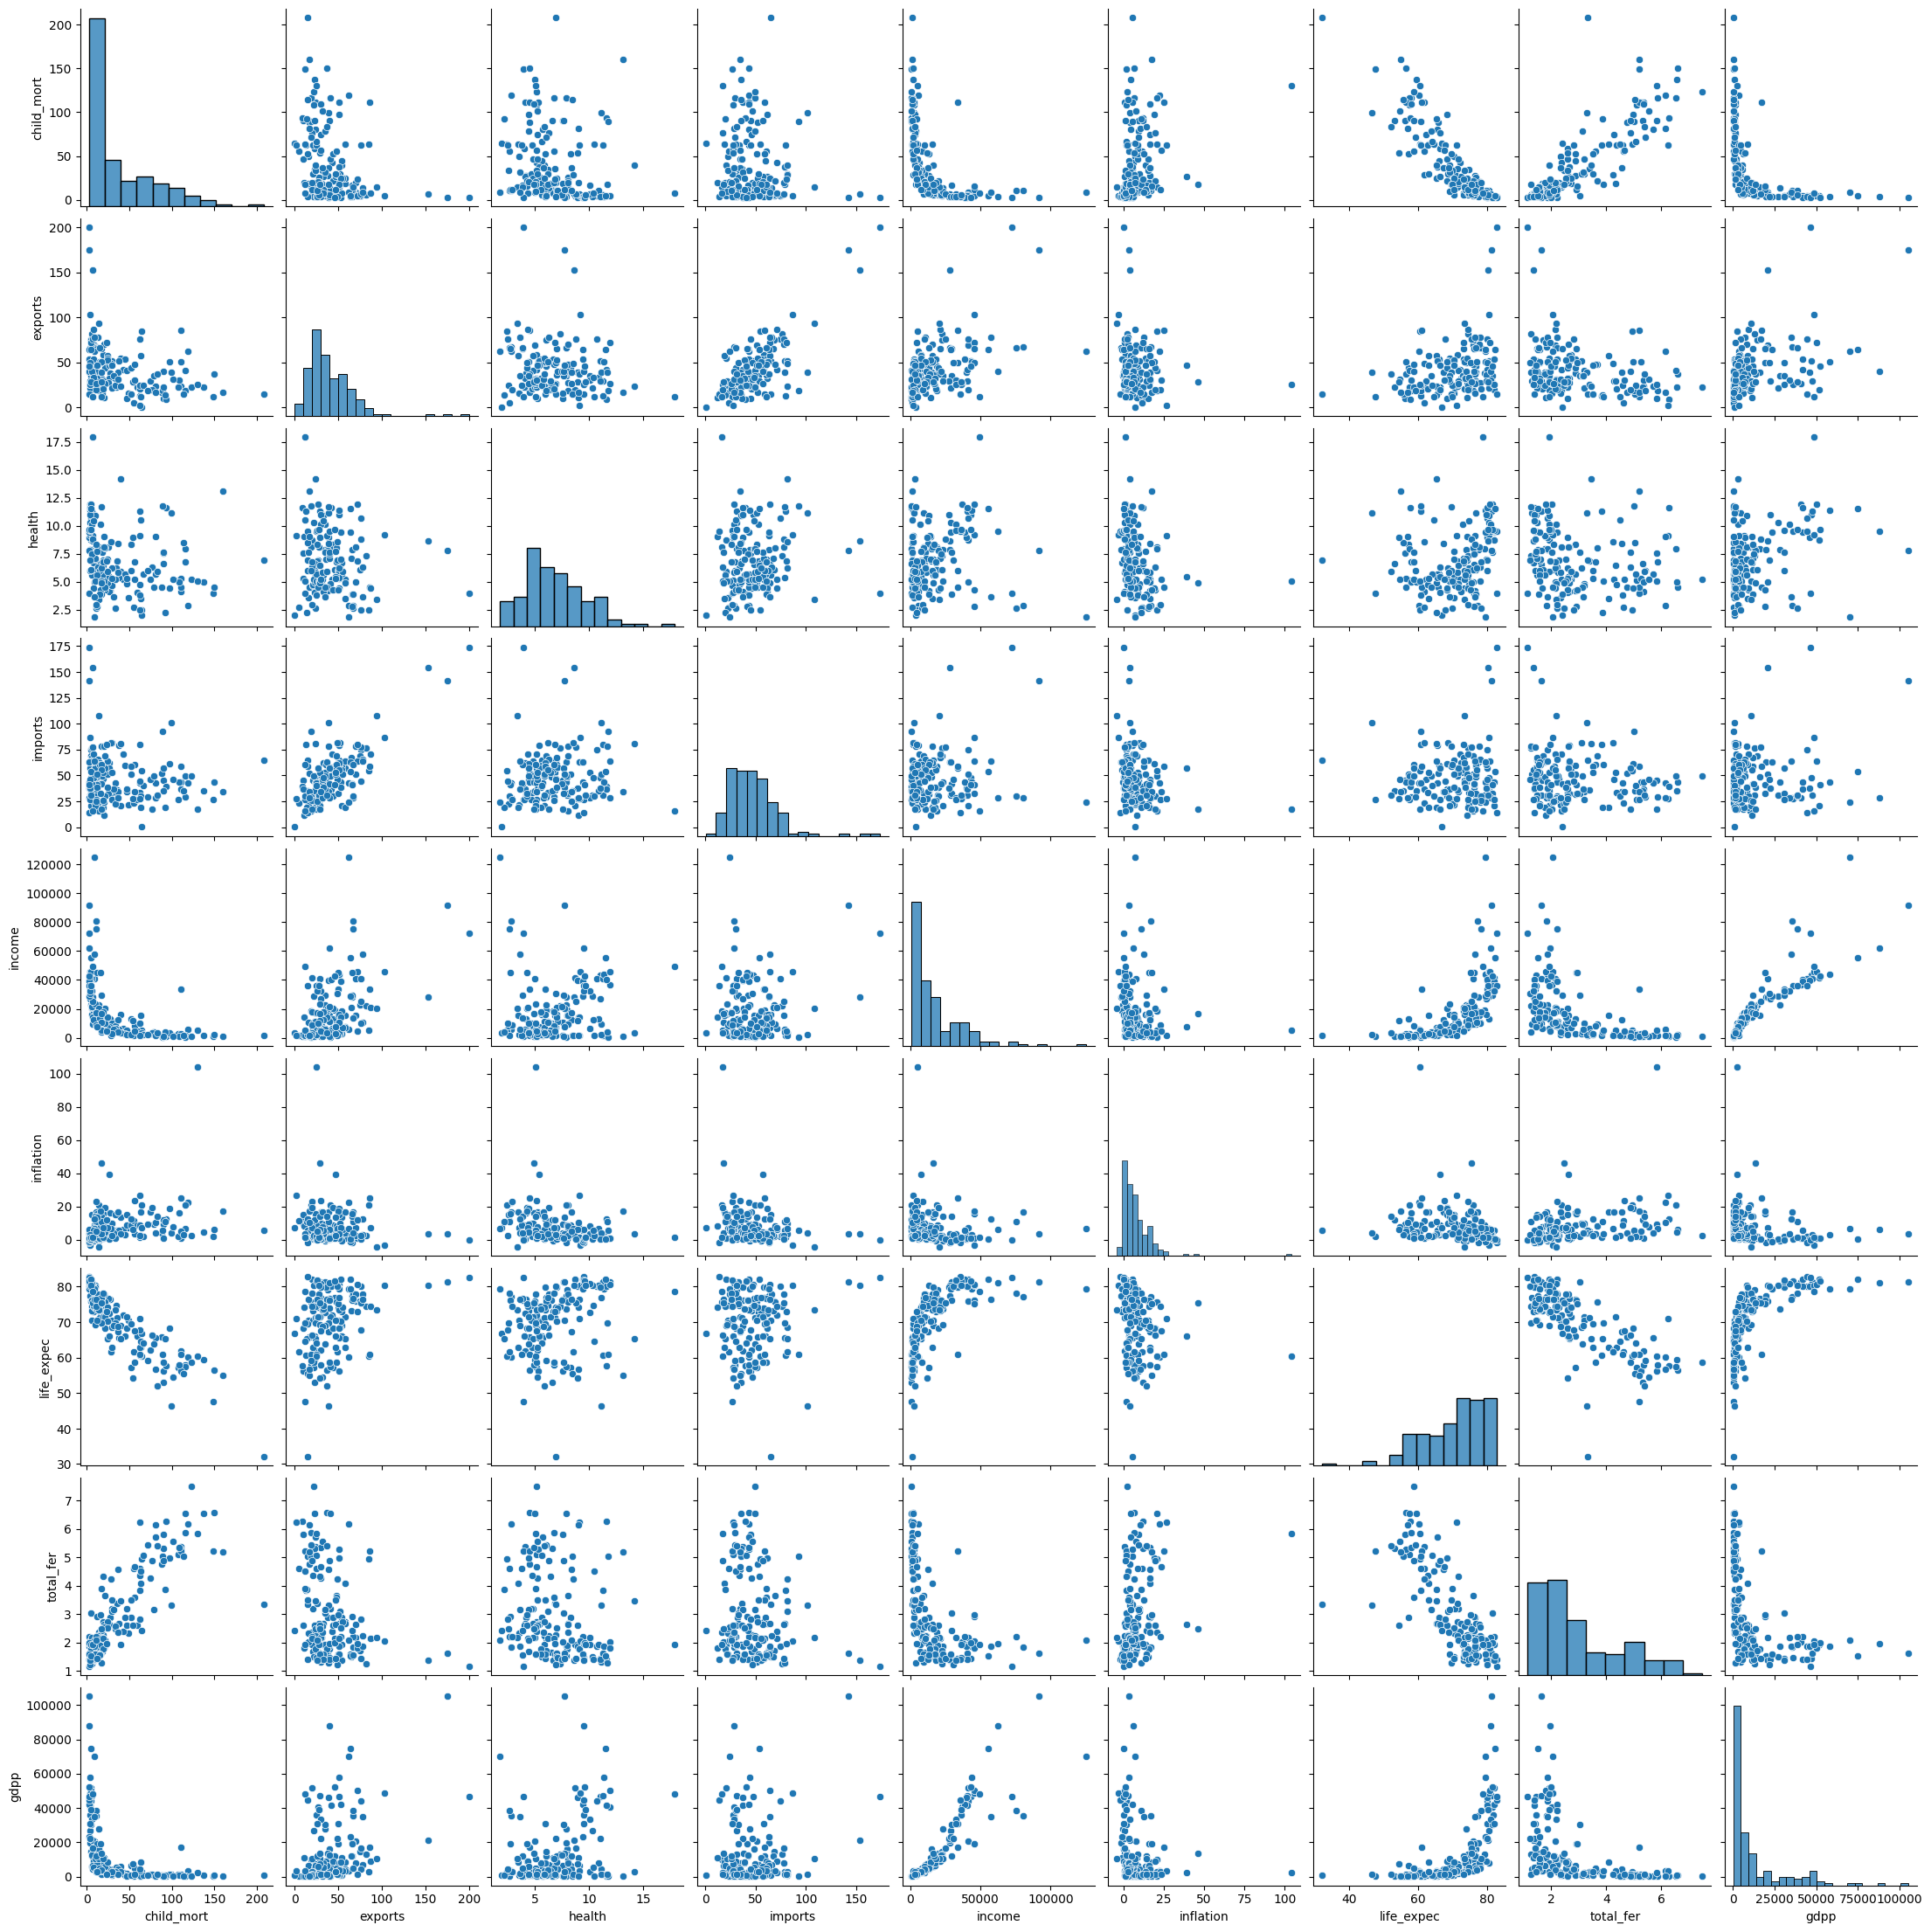

In [ ]:
# Create a pair plot to explore the relationships between features
sns.pairplot(country_df)

***A lot of the data distribution is overlapping for a number of the features. However, there are some that show more distinct distribution than others***
- total fer has a number of distict clusters particularly when compared against health, exports, imports and life expectancy
- child_mort vs life_expec and total_fer have some distinct clusters and very linear patterns
- child_mort vs health or inflation could also produce some distinct clusters
- gdpp vs income has a distinct linear pattern and could form some distinct clusters
- gdpp vs exports, imports or heath could form distinct clusters

### Scaling the Data

In [ ]:
# Normalise the data using MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(country_df)

print(df_scaled.shape)

(167, 9)


## K-Means Clustering

### Selecting K

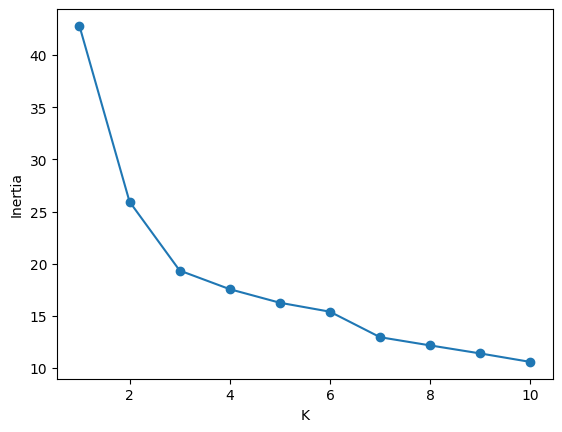

In [14]:
# Plot elbow curve
def eval_Kmeans(x, k, r=rseed):
    kmeans = KMeans(n_clusters=k, random_state=r, max_iter=500)
    kmeans.fit(x)
    return kmeans.inertia_

def elbow_Kmeans(x, max_k=10, r=rseed):
    within_cluster_vars = [eval_Kmeans(x, k, r) for k in range(1, max_k+1)]
    plt.plot(range(1, 11), within_cluster_vars,marker='o')
    plt.xlabel('K')
    plt.ylabel('Inertia')
    plt.show()

elbow_Kmeans(df_scaled)

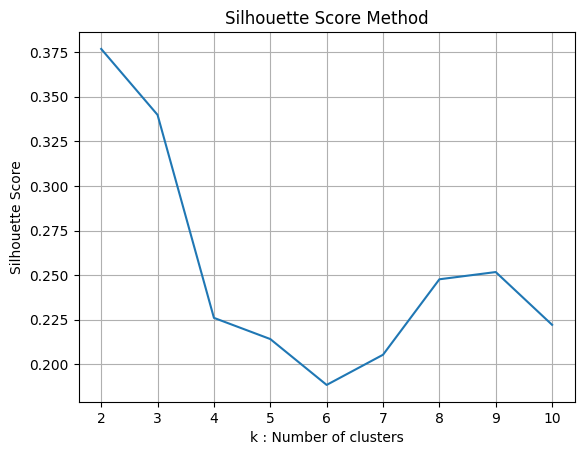

In [15]:
# Silhouette score method
kmax = 10
sil = []
plt.plot()
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k, random_state=rseed, max_iter=500)
    kmeans.fit(df_scaled)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_scaled, labels, metric='euclidean'))

sns.lineplot(x=range(2, kmax+1), y=sil)
plt.title('Silhouette Score Method')
plt.xlabel('k : Number of clusters')
plt.ylabel("Silhouette Score")
plt.grid(visible=True)
plt.show()

## Fitting a K-Means Model with the selected K value

In [16]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=rseed)
kmeans.fit(df_scaled)
labels = kmeans.labels_

In [17]:
# Count the number of records in each cluster
y_pred = kmeans.fit_predict(df_scaled)

print(f"Number of records in Cluster 0: {np.sum(y_pred == 0)}")
print(f"Number of records in Cluster 1: {np.sum(y_pred == 1)}")

Number of records in Cluster 0: 55
Number of records in Cluster 1: 112


In [18]:
# Check model performance with the silhouette coefficient
silhouette_avg = silhouette_score(df_scaled, labels)
print(f'Silhouette Score for {k} clusters: {round (silhouette_avg, 3)}')

Silhouette Score for 2 clusters: 0.377


## Predictions

In [19]:
# Add the predicted cluster label column to the original dataframe
y_pred = kmeans.fit_predict(df_scaled)

country_df['Cluster'] = y_pred

print(country_df.head())

   child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610       9.44        56.2   
1        16.6     28.0    6.55     48.6    9930       4.49        76.3   
2        27.3     38.4    4.17     31.4   12900      16.10        76.5   
3       119.0     62.3    2.85     42.9    5900      22.40        60.1   
4        10.3     45.5    6.03     58.9   19100       1.44        76.8   

   total_fer   gdpp  Cluster  
0       5.82    553        0  
1       1.65   4090        1  
2       2.89   4460        1  
3       6.16   3530        0  
4       2.13  12200        1  


## Visualisation of clusters

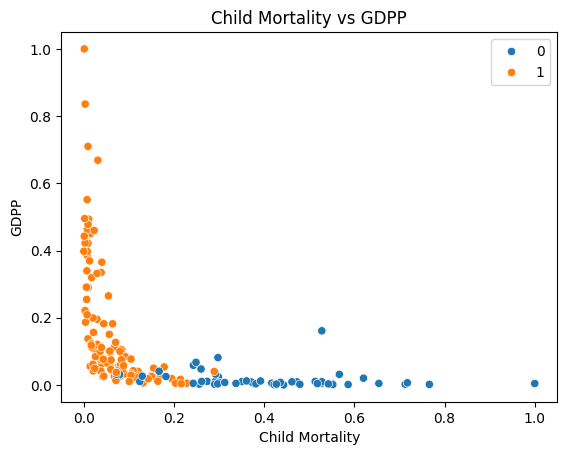

In [20]:
# Visualisation of clusters: child mortality vs gdpp
sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 8], hue=labels)
plt.title('Child Mortality vs GDPP')
plt.xlabel('Child Mortality')
plt.ylabel('GDPP')
plt.show()

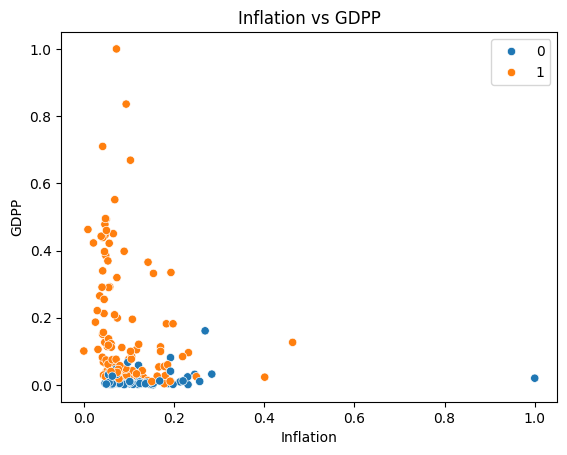

In [21]:
# Visualisation of clusters: inflation vs gdpp
sns.scatterplot(x=df_scaled[:, 5], y=df_scaled[:, 8], hue=labels)
plt.title('Inflation vs GDPP')
plt.xlabel('Inflation')
plt.ylabel('GDPP')
plt.show()

## Conclusions

In [22]:
# Define descriptive labels for each cluster
cluster_labels = {0: 'Least Developed', 1: 'Most Developed'}
# Map descriptive labels to the clusters
country_df['Development Status'] = country_df['Cluster'].map(cluster_labels)

print(country_df[['Development Status', 'Cluster']])

    Development Status  Cluster
0      Least Developed        0
1       Most Developed        1
2       Most Developed        1
3      Least Developed        0
4       Most Developed        1
..                 ...      ...
162    Least Developed        0
163     Most Developed        1
164     Most Developed        1
165    Least Developed        0
166    Least Developed        0

[167 rows x 2 columns]


***Higher inflation and rates of child mortality are more common in less developed countries, in additition, a lower GDPP also shows lower development in a country. Therefore, the clusters that contain higher mortality and inflation and lower GDPP are mapped to the 'Least Developed' label***